![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import seaborn

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
bikes.groupby('season').total.mean()


season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [6]:
for i in range(1,5): 
    sinonimos=["INVIERNO","PRIMAVERA","VERANO", "OTOÑO"]
    print("Estadisticas para la estación de ", sinonimos[i-1])
    temp=bikes[bikes['season']==i]
    print(temp['total'].describe())

Estadisticas para la estación de  INVIERNO
count    2686.000000
mean      116.343261
std       125.273974
min         1.000000
25%        24.000000
50%        78.000000
75%       164.000000
max       801.000000
Name: total, dtype: float64
Estadisticas para la estación de  PRIMAVERA
count    2733.000000
mean      215.251372
std       192.007843
min         1.000000
25%        49.000000
50%       172.000000
75%       321.000000
max       873.000000
Name: total, dtype: float64
Estadisticas para la estación de  VERANO
count    2733.000000
mean      234.417124
std       197.151001
min         1.000000
25%        68.000000
50%       195.000000
75%       347.000000
max       977.000000
Name: total, dtype: float64
Estadisticas para la estación de  OTOÑO
count    2734.000000
mean      198.988296
std       177.622409
min         1.000000
25%        51.000000
50%       161.000000
75%       294.000000
max       948.000000
Name: total, dtype: float64


Como se puede observar en la primera parte la mejor estación el promedio para el alquiler de bicicletas es  el otoño, seguido por el verano, el invierno y por úlimo la primavera. <br>
Del mismo modo, dentro de las estadísticas internas para cada estación en verano se tienen 2733 horas con un máximo de 977 bicicletas alquiladas y un mínimo de 1. Los cuartiles de esta estación se encuentran en 68, 195 y 348. En primavera se tienen 2733 horas con un máximo de 873 bicicletas alquiladas y un mínimo de 1. Los cuartiles de esta estación se encuentran en 49, 172 y 321. Con estos datos se puede observar que no solo en promedio la estación de verano tiene mayores alquileres, sino tambien los datos en general son más altos que para primavera. Por ejemplo, el percentil 50% para verano es de 195 mientras para primavera es de 172. <br>
Ahora, en la estación de otoño se tienen 2734 horas documentadas con un máximo de 948 y un mínimo de 1, los cuartiles para esta estación se encuentran en 51, 161 y 294. En comparación con las dos estaciónes anteriores se puede ver que en cuanto al valor máximo supera al primavera, sin embargo, en general los datos se encuentran  por debajo de las otras dos estaciones. Tambien se puede notar que los valores de esta estación estan más concentrados en el centro del rango teniendo en cuenta que el primer cuartil es mayor al de primavera y el tercer cuartil es menor en ambas estaciones. <br>
Por último, para la estación de invierno se cuenta con 2686 horas, con un máximo de 801 y un mínimo de 1, los cuartiles en este caso corresponden a 24, 78 y 164. observando estos cuartiles y el valor máximo se puede observar que existen horas atipicas en esta estación, es decir que el histograma de esta estación tiene una cola larga hacia la derecha. 

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64


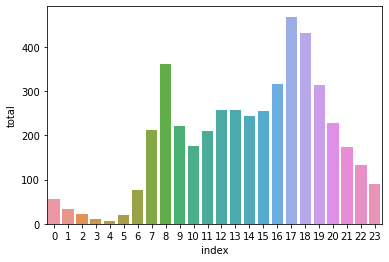

In [7]:
# Celda 1.2
temp_hour=pd.DataFrame(bikes.groupby('hour').total.mean())
temp_hour["index"]=temp_hour.index
seaborn.barplot( temp_hour,  x='index', y='total')
print(bikes.groupby('hour').total.mean())

<AxesSubplot:xlabel='index', ylabel='total'>

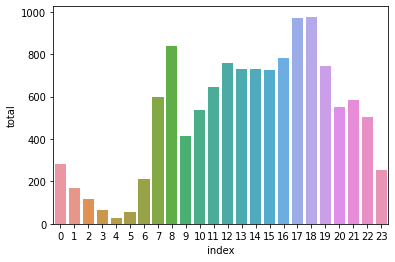

In [8]:
temp_hour=pd.DataFrame(bikes.groupby('hour').total.max())    
temp_hour["index"]=temp_hour.index
seaborn.barplot( temp_hour,  x='index', y='total', )



<AxesSubplot:xlabel='index', ylabel='total'>

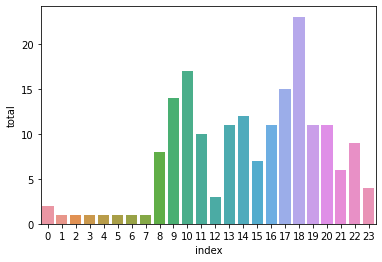

In [23]:
temp_hour=pd.DataFrame(bikes.groupby('hour').total.min())    
temp_hour["index"]=temp_hour.index
seaborn.barplot( temp_hour,  x='index', y='total', )


In [9]:
for i in range(1,24): 
    print("Estadisticas para la hora de ", i)
    temp=bikes[bikes['hour']==i]
    print(temp["total"].describe())



Estadisticas para la hora de  1
count    454.000000
mean      33.859031
std       34.112105
min        1.000000
25%       11.000000
50%       19.000000
75%       46.000000
max      168.000000
Name: total, dtype: float64
Estadisticas para la hora de  2
count    448.000000
mean      22.899554
std       26.110267
min        1.000000
25%        5.000000
50%       11.000000
75%       32.000000
max      119.000000
Name: total, dtype: float64
Estadisticas para la hora de  3
count    433.000000
mean      11.757506
std       12.666442
min        1.000000
25%        3.000000
50%        6.000000
75%       15.000000
max       66.000000
Name: total, dtype: float64
Estadisticas para la hora de  4
count    442.000000
mean       6.407240
std        4.217633
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       28.000000
Name: total, dtype: float64
Estadisticas para la hora de  5
count    452.000000
mean      19.767699
std       12.784293
min        1.000000
25%     

En general, en esta parte se puede observar que existen dos picos de alquiler de bicicletas, el primero en la mañana a las 8 am y el otro que es en promedio mayor a las 6 de la tarde. Del mismo modo, las horas de menor alquiler se presentan en las horas de la madrugada entre la media noche y las 4 de la mañana. 
Con el fin de realizar el análisis de quartiles, maximos y minimos, se va a realizar en las horas más altas y bajas de demanda.<br> 
Entonces para las horas entre las 5 de la tarde y las 8 de la noche se puede observar que a pesar de que a pesar de que en promedio a las 5 de la tarde se presenta el mayor pico, el máximo en general se presenta a las 6 de la tarde. En cuanto a mínimos se observa que a las 6 de la tarde se observa el mínimo más alto, es decir los datos de esta hora estan concentrados en un rango mayor.<br>
Ahora, en las horas de la madrugada, el comportamiento de los máximos es comparable a los promedios. Sin embargo, en cuanto a los mínimos se observa que son uniformes con el registro de un alquiler. 


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

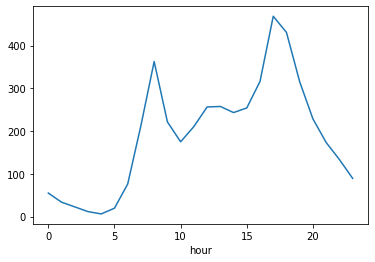

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

Estadisticas para la estación de  INVIERNO
count    2686.000000
mean      116.343261
std       125.273974
min         1.000000
25%        24.000000
50%        78.000000
75%       164.000000
max       801.000000
Name: total, dtype: float64


<AxesSubplot:xlabel='hour'>

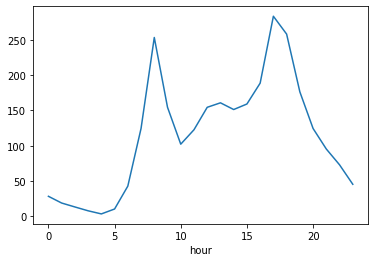

In [26]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
print("Estadisticas para la estación de ", sinonimos[0])
temp_winter=bikes[bikes['season']==1]
print(temp_winter['total'].describe())
temp_winter.groupby('hour').total.mean().plot()


Estadisticas para la estación de  INVIERNO
count    2733.000000
mean      234.417124
std       197.151001
min         1.000000
25%        68.000000
50%       195.000000
75%       347.000000
max       977.000000
Name: total, dtype: float64


<AxesSubplot:xlabel='hour'>

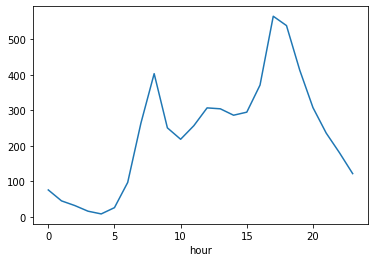

In [25]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
print("Estadisticas para la estación de ", sinonimos[0])
temp_summer=bikes[bikes['season']==3]
print(temp_summer['total'].describe())
temp_summer.groupby('hour').total.mean().plot()

Lo primero que se observa en estas graficas es el cambio en el rango del eje y, mientras en invierno se observa un promedio máximo alrededor de las 300 bicicletas a más de 500.Sin embargo, en general se observa un comportamiento muy parecido, con picos a las 8 de la mañana y 6 de la tarde y una baja en la madrugada. En la gráfica en general se confirma que en verano se alquilan más bicicletas en promedio durante todo el día que en invierno.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [13]:
# Celda 3
reg = LinearRegression().fit(bikes[["hour", "season"]], bikes[["total"]])
print("los coeficientes son:")
print("para la variable hora :", reg.coef_[0][0])
print("para la variable estación :", reg.coef_[0][1])
print("el intercepto es: :", reg.intercept_[0])


los coeficientes son:
para la variable hora : 10.521298236576193
para la variable estación : 26.951308510673897
el intercepto es: : 2.5848513346808204


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando manualmente sobre las variables "hour" y "season". El árbol debe tener al menos 6 nodos finales.

In [14]:
# Celda 4

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
def gini_impurity(X_col, j,  y, split):
    if j=="hour": 
        filter_l = X_col < split
    else:
        filter_l = X_col == split
    
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

def best_split(X, y, num_pct=1):
    
    best_split = [0, 1, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in X.columns:
        
        splits = X[j].unique()
       
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X[j], j, y, split)

            if gain[0] > best_split[2]:
                best_split = [j, split, gain[0]]
    
    return best_split


def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=1):
    
    j, split, gain = best_split(X, y, num_pct)
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    

    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    if j=="hour":
        filter_l = X[j] < split
    else:
        filter_l = X[j] == split
         
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

X=bikes[["hour", "season"]]
y= bikes[["total"]]

tree_grow(X, y, level=0, min_gain=0.001, max_depth=5, num_pct=1)


{'y_pred': 1,
 'y_prob': total    191.539034
 dtype: float64,
 'level': 0,
 'split': ['hour', 7],
 'n_samples': 10886,
 'gain': 20485.13561876939,
 'sl': {'y_pred': 1,
  'y_prob': total    32.561605
  dtype: float64,
  'level': 1,
  'split': ['hour', 6],
  'n_samples': 3139,
  'gain': 646.8008927589567,
  'sl': {'y_pred': 1,
   'y_prob': total    25.159345
   dtype: float64,
   'level': 2,
   'split': ['hour', 2],
   'n_samples': 2684,
   'gain': 382.8088308604629,
   'sl': {'y_pred': 1,
    'y_prob': total    44.413831
    dtype: float64,
    'level': 3,
    'split': ['season', 1],
    'n_samples': 909,
    'gain': 291.4004681825131,
    'sl': {'y_pred': 1,
     'y_prob': total    23.324561
     dtype: float64,
     'level': 4,
     'split': ['hour', 1],
     'n_samples': 226,
     'gain': 45.41972746495435,
     'sl': {'y_pred': 1,
      'y_prob': total    27.808696
      dtype: float64,
      'level': 5,
      'split': -1,
      'n_samples': 113,
      'gain': 0},
     'sr': {'y_pre

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [59]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

train_6, test_6 = train_test_split(bikes, test_size=0.33, random_state=0)

X_train_6=train_6[["hour","season"]]
y_train_6=pd.Series(data=train_6["total"])
X_test_6=test_6[["hour","season"]]
y_test_6=pd.Series(data=test_6["total"])

arbol = DecisionTreeRegressor(splitter="random", max_depth=2)
arbol=arbol.fit(X_train_6, y_train_6)
prediccion=arbol.predict(X_test_6)

MSEArbol=np.average(np.square(prediccion-y_test_6))
print("El mse del modelo de árbol en la muestra de evaluación es igual a:")
print(MSEArbol)

fpr, tpr, thresholds = metrics.roc_curve(y_test_6, prediccion, pos_label=2)
auc_arbol=metrics.auc(fpr, tpr)
print("El AUC del modelo de árbol en la muestra de evaluación es igual a:")
print(auc_arbol)

regression = LinearRegression()
regression=regression.fit(X_train_6, y_train_6)
prediccion_reg=regression.predict(X_test_6)

MSEreg=np.average(np.square(prediccion_reg-y_test_6))
print("El MSE del modelo de regresión en la muestra de evaluación es igual a:")
print(MSEreg)

fpr, tpr, thresholds = metrics.roc_curve(y_test_6, prediccion_reg, pos_label=2)
auc_reg=metrics.auc(fpr, tpr)
print("El AUC del modelo de regresión en la muestra de evaluación es igual a:")
print(auc_reg)


El mse del modelo de árbol en la muestra de evaluación es igual a:
26845.352772399805
El AUC del modelo de árbol en la muestra de evaluación es igual a:
0.2277399279397314
El MSE del modelo de regresión en la muestra de evaluación es igual a:
26895.62015728526
El AUC del modelo de regresión en la muestra de evaluación es igual a:
0.09745823779888634


Como se puede observar el mejor desempeño es el Árbol. Sin embargo, ninguno de los dos presenta un buen desempeño por lo que seria pertinente revisar otras variables que puedan aportar información de interes. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [16]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [17]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [18]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [19]:
# Celda 6
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression


reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

prediccion_reg_log=reg_log.predict(X_test)

arbolito = DecisionTreeRegressor(splitter= "random",max_leaf_nodes=9)
arbolito.fit(X_train, y_train)

prediccion_arbolito=arbolito.predict(X_test)


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [32]:
# Celda 7

n_estimators = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

models = {}
for i in range(n_estimators):
    if i<=99:
        models[i] = DecisionTreeRegressor(max_depth=9)
        models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    elif i<200:
        models[i] = DecisionTreeRegressor(min_samples_leaf=45)
        models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    else: 
        models[i] = LogisticRegression()
        models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = models[i].predict(X_test)


y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
f1_7=metrics.f1_score(y_pred, y_test)
accuracy_7=metrics.accuracy_score(y_pred, y_test)

print(f1_7,accuracy_7 )

0.6163182737693863 0.6206666666666667


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [33]:
# Celda 8

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for i in range(300):
    a=sorted(set(range(n_samples)) - set(samples[i]))
    samples_oob.append(a)

errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = models[i].predict(X_train.iloc[samples_oob[i]])
    for j in range(len(y_pred_)):
        if y_pred_[j]<=0.5:
             y_pred_[j]=0
        else: 
            y_pred_[j]=1 
   
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

alpha = (1 - errors) / (1 - errors).sum()
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
f1_8=metrics.f1_score(y_pred, y_test)
accuracy_8=metrics.accuracy_score(y_pred, y_test)

print(f1_8,accuracy_8 )

0.6160053799596503 0.6193333333333333


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

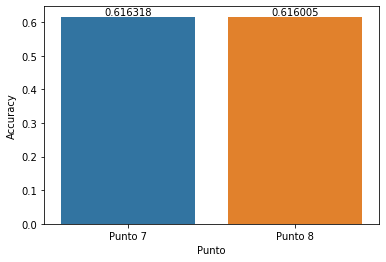

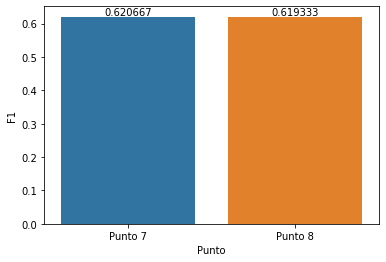

In [22]:
# Celda 9
import matplotlib.pyplot as plt
Valores_x=["Punto 7", "Punto 8"]
Valores_y=[f1_7, f1_8]
Valores_y_2=[accuracy_7, accuracy_8]

fig = seaborn.barplot(x=Valores_x, y=Valores_y)
fig.set(xlabel='Punto', ylabel='Accuracy')
fig.bar_label(fig.containers[0])
plt.show()

fig = seaborn.barplot(x=Valores_x, y=Valores_y_2)
fig.set(xlabel='Punto', ylabel='F1')
fig.bar_label(fig.containers[0])
plt.show()

Como se puede observar el accuracy y la métrica F1 son ligrramente mejores en el modelo desarrollado en el punto 7, la principal ventaja de la votación mayoritaria es su simplicidad, en este caso especifico los modelos escogidos en el caso de los arboles de decisión nivelaban los parametros escogidos equilibravan tanto la profundad del arbol como la cantidad de hojas generadas. En general, la votación mayoritaria puede tener desventajas como la falta de representatividad, sin embargo, como en este caso contabamos con una muestra equilibrada no fue un problema. 